### Mushroom Edibility Predictor
How likely is your mushroom going to kill you? 

In [116]:
import pandas as pd

Step 1: We will prepare the data and visualize them.

In [117]:
mushroom = pd.read_csv('agaricus-lepiota.data')
mushroom

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


Step 1.1. We will add columns name and the actral cell input back into the table for easier understanding.

In [118]:
columns_name = [
    'edibility','cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
    'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',
    'spore_print_color', 'population', 'habitat'
]

mushroom.columns = columns_name
mushroom

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [119]:
column_map = {
    'edibility': {'e': 'ediable', 'p':'poisonous'},
    'cap_shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap_surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap_color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 
                  'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 
             'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill_attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill_spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill_size': {'b': 'broad', 'n': 'narrow'},
    'gill_color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 
                   'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 
                   'w': 'white', 'y': 'yellow'},
    'stalk_shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk_root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 
                   'r': 'rooted', '?': 'missing'},
    'stalk_surface_above_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk_surface_below_ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk_color_above_ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk_color_below_ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 
                               'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil_type': {'p': 'partial', 'u': 'universal'},
    'veil_color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring_number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring_type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 
                  'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore_print_color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 
                          'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 
                  'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 
                'w': 'waste', 'd': 'woods'}
}

for column in mushroom.columns:
    if column in column_map:
        mushroom[column] = mushroom[column].replace(column_map[column])

mushroom


,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,ediable,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
1,ediable,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
2,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
3,ediable,convex,smooth,gray,no bruises,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
4,ediable,convex,scaly,yellow,bruises,almond,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,black,numerous,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,ediable,knobbed,smooth,brown,no bruises,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8119,ediable,convex,smooth,brown,no bruises,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8120,ediable,flat,smooth,brown,no bruises,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8121,poisonous,knobbed,scaly,brown,no bruises,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


Step 1.3. We can add predictive model imputation that uses machine learning models (Random Forest) to predict missing values based on other features in the dataset, but for now we will drop the column.

In [120]:
print(mushroom.isnull().sum())


edibility                   0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64


In [121]:
missing_value_count = (mushroom == 'missing').sum().sum()
missing_value_count

2480

Step 1.4. Let's visualize the frequency distribution of each categorical feature, colored by edibility to see how the categories relate to edibility.

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
categorical_columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment',
    'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
    'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring',
    'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 'ring_type',
    'spore_print_color', 'population', 'habitat']


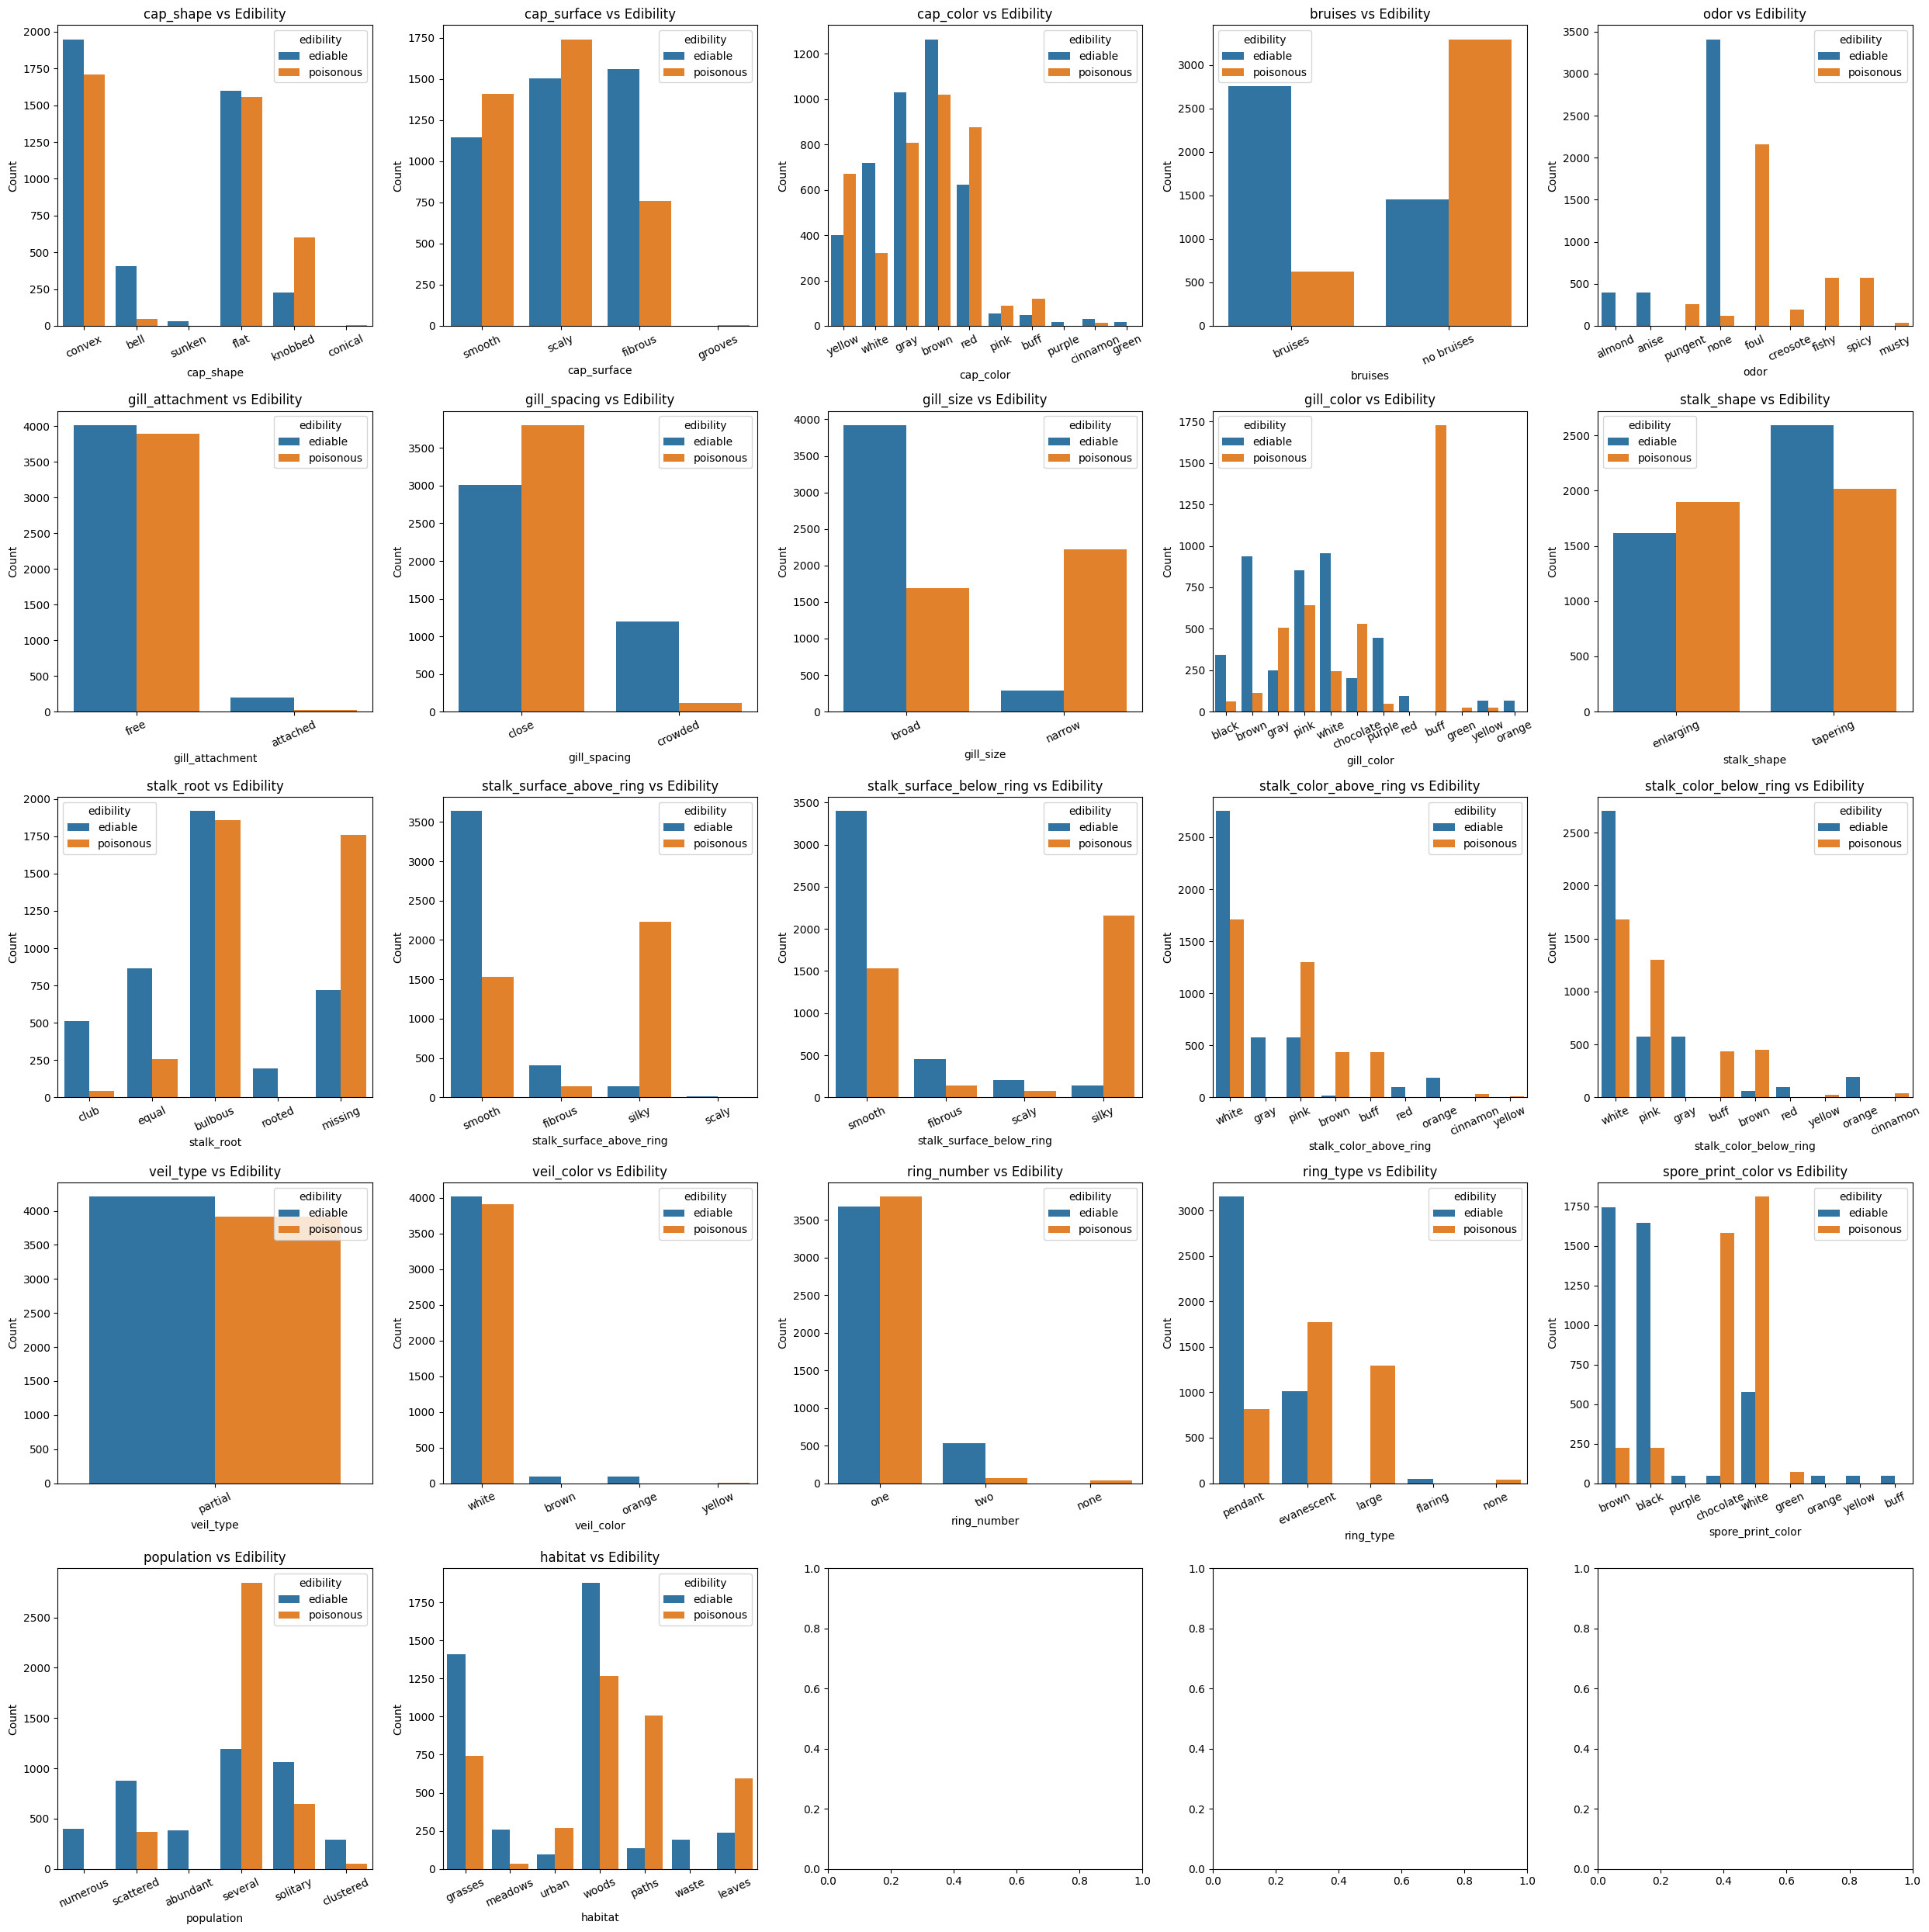

In [124]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(25, 25))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=mushroom, x=column, hue='edibility', ax=axes[i])
    axes[i].set_title(f'{column} vs Edibility')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    
    for label in axes[i].get_xticklabels():
        label.set_rotation(25)

plt.tight_layout()
plt.show()


Step 2. Let's prepare the data to bild the classification model for predicting mushroom edibility.

Step 2.1. We need to ensure teh dataset is preprossed and split into features, and the target (edibility). We will use 80% of data for training, and 20% for testing.

In [125]:
for column in categorical_columns:
    label_encoder = LabelEncoder()
    mushroom[f'{column}_encoded'] = le.fit_transform(mushroom[column])
    
    # Print the mapping for each column
    print(f"\nLabel encoding mapping for '{column}':")
    for category, label in zip(le.classes_, range(len(le.classes_))):
        print(f'{category}: {label}')


Label encoding mapping for 'cap_shape':
bell: 0
conical: 1
convex: 2
flat: 3
knobbed: 4
sunken: 5

Label encoding mapping for 'cap_surface':
fibrous: 0
grooves: 1
scaly: 2
smooth: 3

Label encoding mapping for 'cap_color':
brown: 0
buff: 1
cinnamon: 2
gray: 3
green: 4
pink: 5
purple: 6
red: 7
white: 8
yellow: 9

Label encoding mapping for 'bruises':
bruises: 0
no bruises: 1

Label encoding mapping for 'odor':
almond: 0
anise: 1
creosote: 2
fishy: 3
foul: 4
musty: 5
none: 6
pungent: 7
spicy: 8

Label encoding mapping for 'gill_attachment':
attached: 0
free: 1

Label encoding mapping for 'gill_spacing':
close: 0
crowded: 1

Label encoding mapping for 'gill_size':
broad: 0
narrow: 1

Label encoding mapping for 'gill_color':
black: 0
brown: 1
buff: 2
chocolate: 3
gray: 4
green: 5
orange: 6
pink: 7
purple: 8
red: 9
white: 10
yellow: 11

Label encoding mapping for 'stalk_shape':
enlarging: 0
tapering: 1

Label encoding mapping for 'stalk_root':
bulbous: 0
club: 1
equal: 2
missing: 3
rooted:

In [130]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in categorical_columns:
    mushroom[column] = label_encoder.fit_transform(mushroom[column])

mushroom

,edibility,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring_encoded,stalk_color_above_ring_encoded,stalk_color_below_ring_encoded,veil_type_encoded,veil_color_encoded,ring_number_encoded,ring_type_encoded,spore_print_color_encoded,population_encoded,habitat_encoded
0,ediable,2,3,9,0,0,1,0,0,0,...,3,7,7,0,2,1,4,1,2,0
1,ediable,0,3,8,0,1,1,0,0,1,...,3,7,7,0,2,1,4,1,2,2
2,poisonous,2,2,8,0,7,1,0,1,1,...,3,7,7,0,2,1,4,0,3,4
3,ediable,2,3,3,1,6,1,1,0,0,...,3,7,7,0,2,1,0,1,0,0
4,ediable,2,2,9,0,0,1,0,0,1,...,3,7,7,0,2,1,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,ediable,4,3,0,1,6,0,0,0,11,...,3,4,4,0,1,1,4,2,1,1
8119,ediable,2,3,0,1,6,0,0,0,11,...,3,4,4,0,0,1,4,2,4,1
8120,ediable,3,3,0,1,6,0,0,0,1,...,3,4,4,0,1,1,4,2,1,1
8121,poisonous,4,2,0,1,3,1,0,1,2,...,2,7,7,0,2,1,0,7,4,1


In [131]:
X = mushroom.drop('edibility', axis=1)
Y = mushroom['edibility']

In [132]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Step 2.2. We will use decision tree, random forest, logistic regression and SVM. Why 42? Well, it is the Answer to the Ultimate Question of Life, the Universe, and Everything.

In [133]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
}

model_results = {}

for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    roc_auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1])
    model_results[name] = {'accuracy': accuracy, 'roc_auc': roc_auc}
    
    print(f'{name} - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}')
    print(classification_report(Y_test, Y_pred))


Decision Tree - Accuracy: 1.0000, ROC-AUC: 1.0000
              precision    recall  f1-score   support

     ediable       1.00      1.00      1.00       853
   poisonous       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest - Accuracy: 1.0000, ROC-AUC: 1.0000
              precision    recall  f1-score   support

     ediable       1.00      1.00      1.00       853
   poisonous       1.00      1.00      1.00       772

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [134]:
# Apply 5 k-fold cross-validation
for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} - Mean CV Accuracy: {cv_scores.mean():.4f}, Standard Deviation: {cv_scores.std():.4f}')


Decision Tree - Mean CV Accuracy: 0.9169, Standard Deviation: 0.1056
Random Forest - Mean CV Accuracy: 0.8985, Standard Deviation: 0.1385


Result is The Decision Tree model stands out as the most accurate and stable option based on these results.

In [135]:
decision_tree = models['Decision Tree']
if hasattr(decision_tree, 'feature_importances_'):
    importances = decision_tree.feature_importances_
    indices = importances.argsort()[::-1]  
    print(f'Feature importance for Decision Tree:')
    for i in range(7):
        print(f'{X.columns[indices[i]]}: {importances[indices[i]]:.4f}')

Feature importance for Decision Tree:
spore_print_color_encoded: 0.5216
ring_number: 0.1690
gill_size_encoded: 0.1490
veil_color_encoded: 0.0443
gill_spacing_encoded: 0.0339
population: 0.0227
odor: 0.0178


In [ ]:

user_sample = pd.DataFrame({
    'odor_none': [1, 0],
    'stalk_root_club': [1, 0],
    'stalk_surface_below_ring_scaly': [1, 0],
    'spore_print_color_green': [0, 1],
    'odor_anise': [0, 0],
    'spore_print_color_white': [0, 0],
    'spore_print_color_purple': [0, 0],

})

predictions = decision_tree_model.predict(real_samples)

# Print the predictions
for i, pred in enumerate(predictions):
    print(f"Sample {i+1} is {'poisonous' if pred == 1 else 'edible'}")


NameError: name 'decision_tree_model' is not defined